# WeatherPy
----
### Analysis
* As expected, cities closer to the equator have a higher temperature, however it is interesting to note that distance from the equater has a bigger effect on the Southern than Northern Hemisphere. Cities with a latitude between 40 to 60 degrees are significnatly colder than cities with a latitude between -40 to -60

* Latitude seems to have minimal effect on wind speed. Of the cities measured, there was a larger concentration of outlier cities with wind speeds above 20MPH as we move further from the equator

* Latitude and Cloudiness do not have a strong relationship, however there appears to be bands at 0%, 20%, 40%, 75% and 90% indicating that this data is typically rounded to a specific target number.  


In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint


# Import API key
from config import key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



In [143]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [144]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create DataFrame
df = pd.DataFrame(data={"City": cities})
df["Cloudiness"] = ""
df["Country"] = ""
df["Date"] = ""
df["Humidity"] = ""
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Wind Speed"] = ""

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,,,,,,,,
1,kodiak,,,,,,,,
2,cabo san lucas,,,,,,,,
3,yar-sale,,,,,,,,
4,arraial do cabo,,,,,,,,


In [145]:
# Print log of each city as its being processed and fill DataFrame with data from each API call
x=1
print("Beginning Data Retrieval")
print("---------------------")
for index, row in df.iterrows():
    dfcity = row["City"]
    url = base_url + "appid=" + key + "&q=" + dfcity + "&units=imperial"
    response = requests.get(url).json()
    try:
        print(f"Processing Record {x} | {dfcity}")
        x += 1
        df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        df.loc[index, "Country"] = response["sys"]["country"]
        df.loc[index, "Date"] = time.asctime(time.gmtime(response["dt"]))
        df.loc[index, "Humidity"] = response["main"]["humidity"]
        df.loc[index, "Lat"] = response["coord"]["lat"]
        df.loc[index, "Lng"] = response["coord"]["lon"]
        df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    except (NameError, KeyError):
        print("City not found. Skipping...")
        
print("---------------------")
print("Data Retrieval Complete")
print("---------------------")



Beginning Data Retrieval
---------------------
Processing Record 1 | cape town
Processing Record 2 | kodiak
Processing Record 3 | cabo san lucas
Processing Record 4 | yar-sale
Processing Record 5 | arraial do cabo
Processing Record 6 | bluff
Processing Record 7 | talnakh
Processing Record 8 | yellowknife
Processing Record 9 | tsihombe
City not found. Skipping...
Processing Record 10 | nikolskoye
Processing Record 11 | ribeira grande
Processing Record 12 | kununurra
Processing Record 13 | castro
Processing Record 14 | klyuchi
Processing Record 15 | kabare
Processing Record 16 | natal
Processing Record 17 | mataura
Processing Record 18 | petropavlovsk-kamchatskiy
Processing Record 19 | namatanai
Processing Record 20 | sirsilla
Processing Record 21 | georgetown
Processing Record 22 | dien bien
City not found. Skipping...
Processing Record 23 | victoria
Processing Record 24 | hermanus
Processing Record 25 | nizhniy kuranakh
Processing Record 26 | pisco
Processing Record 27 | rikitea
Proces

Processing Record 228 | cherskiy
Processing Record 229 | namibe
Processing Record 230 | hasaki
Processing Record 231 | havelock
Processing Record 232 | saleaula
City not found. Skipping...
Processing Record 233 | nongan
Processing Record 234 | rojhan
Processing Record 235 | umm lajj
Processing Record 236 | lolua
City not found. Skipping...
Processing Record 237 | nizhneyansk
City not found. Skipping...
Processing Record 238 | lata
Processing Record 239 | marawi
Processing Record 240 | qaanaaq
Processing Record 241 | nuuk
Processing Record 242 | bonnyville
Processing Record 243 | salmon arm
Processing Record 244 | saskylakh
Processing Record 245 | nago
Processing Record 246 | port hardy
Processing Record 247 | teahupoo
Processing Record 248 | ibra
Processing Record 249 | goure
Processing Record 250 | vondrozo
Processing Record 251 | bulgan
Processing Record 252 | okhotsk
Processing Record 253 | dujuma
City not found. Skipping...
Processing Record 254 | morondava
Processing Record 255 | 

Processing Record 454 | bar-le-duc
Processing Record 455 | nouadhibou
Processing Record 456 | deputatskiy
Processing Record 457 | along
Processing Record 458 | tuatapere
Processing Record 459 | atyrau
Processing Record 460 | maragogi
Processing Record 461 | gambo
Processing Record 462 | itapetinga
Processing Record 463 | schrobenhausen
Processing Record 464 | manokwari
Processing Record 465 | moose factory
Processing Record 466 | paamiut
Processing Record 467 | ratangarh
Processing Record 468 | iwanai
Processing Record 469 | babanusah
City not found. Skipping...
Processing Record 470 | sarab
Processing Record 471 | ruatoria
City not found. Skipping...
Processing Record 472 | dracena
Processing Record 473 | makakilo city
Processing Record 474 | pathein
Processing Record 475 | beloha
Processing Record 476 | hoshangabad
Processing Record 477 | melito di porto salvo
Processing Record 478 | minot
Processing Record 479 | mogadishu
Processing Record 480 | bur gabo
City not found. Skipping...


In [146]:
df.count()

City          619
Cloudiness    619
Country       619
Date          619
Humidity      619
Lat           619
Lng           619
Max Temp      619
Wind Speed    619
dtype: int64

In [147]:
df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,75,ZA,Mon Apr 1 08:23:11 2019,67,-33.93,18.42,66.99,8.05
1,kodiak,1,US,Mon Apr 1 08:27:04 2019,50,39.95,-94.76,35.01,9.17
2,cabo san lucas,0,MX,Mon Apr 1 08:25:39 2019,50,22.89,-109.91,69.01,11.65
3,yar-sale,0,RU,Mon Apr 1 08:28:46 2019,92,66.83,70.83,27.3,12.66
4,arraial do cabo,36,BR,Mon Apr 1 08:28:47 2019,100,-22.97,-42.02,72.39,3.6
5,bluff,0,AU,Mon Apr 1 08:28:47 2019,41,-23.58,149.07,72.39,5.73
6,talnakh,88,RU,Mon Apr 1 08:28:47 2019,96,69.49,88.39,30.09,7.96
7,yellowknife,40,CA,Mon Apr 1 08:23:36 2019,74,62.45,-114.38,28.4,18.34
8,tsihombe,,,,,,,,
9,nikolskoye,40,RU,Mon Apr 1 08:26:58 2019,80,59.7,30.79,48,15.66


In [148]:
# Drop empty rows from DataFrame
df = df[df.Date != ""]
df.reset_index(inplace=True, drop=True)
df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,75,ZA,Mon Apr 1 08:23:11 2019,67,-33.93,18.42,66.99,8.05
1,kodiak,1,US,Mon Apr 1 08:27:04 2019,50,39.95,-94.76,35.01,9.17
2,cabo san lucas,0,MX,Mon Apr 1 08:25:39 2019,50,22.89,-109.91,69.01,11.65
3,yar-sale,0,RU,Mon Apr 1 08:28:46 2019,92,66.83,70.83,27.3,12.66
4,arraial do cabo,36,BR,Mon Apr 1 08:28:47 2019,100,-22.97,-42.02,72.39,3.6
5,bluff,0,AU,Mon Apr 1 08:28:47 2019,41,-23.58,149.07,72.39,5.73
6,talnakh,88,RU,Mon Apr 1 08:28:47 2019,96,69.49,88.39,30.09,7.96
7,yellowknife,40,CA,Mon Apr 1 08:23:36 2019,74,62.45,-114.38,28.4,18.34
8,nikolskoye,40,RU,Mon Apr 1 08:26:58 2019,80,59.7,30.79,48,15.66
9,ribeira grande,40,PT,Mon Apr 1 08:00:00 2019,67,38.52,-28.7,57.2,9.17


In [149]:
# Output File (CSV)
output_data_file = "../Results/cities.csv"
df.to_csv(output_data_file, encoding="utf-8", index=False, header=True)

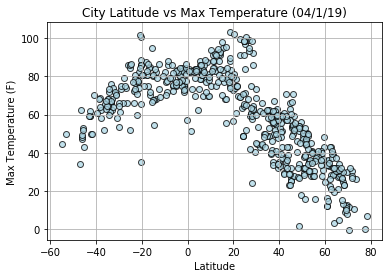

In [150]:
max_temp_list = [x for x in df["Max Temp"]]
latitude = [x for x in df["Lat"]]

plt.scatter(latitude, max_temp_list, marker ="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Max Temperature (04/1/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Results/Temperature")

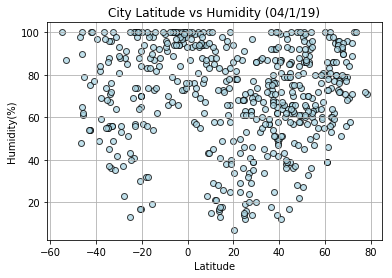

In [151]:
humidity = [x for x in df["Humidity"]]

plt.scatter(latitude, humidity, marker ="o",facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Humidity (04/1/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("../Results/Humidity")
plt.show()

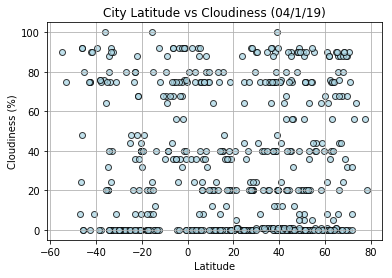

In [152]:
cloudiness = [x for x in df["Cloudiness"]]

plt.scatter(latitude, cloudiness, marker ="o",facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Cloudiness (04/1/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Results/Cloudiness")
plt.show()

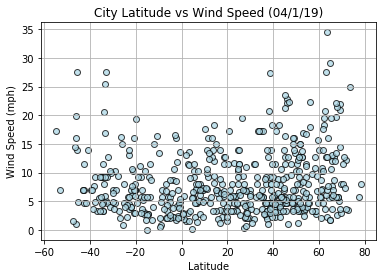

In [153]:
wind_speed = [x for x in df["Wind Speed"]]

plt.scatter(latitude, wind_speed, marker ="o",facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.grid()
plt.title("City Latitude vs Wind Speed (04/1/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Results/Wind_Speed")
plt.show()